## Data Collection(Selenium + BeautifulSoup)

In [15]:
pip install selenium webdriver-manager beautifulsoup4 pandas textblob nltk wordcloud seaborn

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/3 [python-dotenv]
   ---------------------------------------- 0/3 [python-dotenv]
   ------------- -------------------------- 1/3 [webdriver-manager]
   ------------- -------------------------- 1/3 [webdriver-manager]
   ------------- -------------------------- 1/3 [webdriver-manager]
   ------------- -------------------------- 1/3 [webdriver-manager]
   -------------------------- ------------- 2/3 [wordcloud]
   -------------------------- ------------- 2/3 [wordcloud]
   ---------------------------------------- 3/3 [wordcloud]

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager

options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
options.add_argument("--disable-blink-features=AutomationControlled")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

wait = WebDriverWait(driver, 10)

driver.get("https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=")

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

Names = []
Cities = []
Occasions = []
Posted_On = []
Ratings = []
Reviews = []

base_url = "https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page="

for page in range(1, 50):
    print("Scraping page:", page)
    
    url = base_url + str(page)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")
    
    main = soup.find("div", class_="review-left-container")
    
    if main is None:
        continue
        
    cards = main.find_all("div", class_="new-review-card-container")
    
    for card in cards:
        
        # Name
        name = card.find("span", class_="review-author-name")
        Names.append(name.text.strip().title() if name else np.nan)
        
        # City & Occasion
        meta = card.find_all("span", class_="review-meta-details")
        
        Cities.append(meta[0].text.strip().title() if len(meta) > 0 else np.nan)
        Occasions.append(meta[1].text.strip().title() if len(meta) > 1 else np.nan)
        
        # Posted On
        spans = card.find_all("span")
        Posted_On.append(spans[4].text.strip() if len(spans) > 4 else np.nan)
        
        # Rating
        rating = card.find("span", class_="star-count-container")
        Ratings.append(rating.text.strip() if rating else np.nan)
        
        # Review Text
        review_divs = card.find_all("div")
        Reviews.append(review_divs[-1].text.strip() if review_divs else np.nan)



Scraping page: 1
Scraping page: 2
Scraping page: 3
Scraping page: 4
Scraping page: 5
Scraping page: 6
Scraping page: 7
Scraping page: 8
Scraping page: 9
Scraping page: 10
Scraping page: 11
Scraping page: 12
Scraping page: 13
Scraping page: 14
Scraping page: 15
Scraping page: 16
Scraping page: 17
Scraping page: 18
Scraping page: 19
Scraping page: 20
Scraping page: 21
Scraping page: 22
Scraping page: 23
Scraping page: 24
Scraping page: 25
Scraping page: 26
Scraping page: 27
Scraping page: 28
Scraping page: 29
Scraping page: 30
Scraping page: 31
Scraping page: 32
Scraping page: 33
Scraping page: 34
Scraping page: 35
Scraping page: 36
Scraping page: 37
Scraping page: 38
Scraping page: 39
Scraping page: 40
Scraping page: 41
Scraping page: 42
Scraping page: 43
Scraping page: 44
Scraping page: 45
Scraping page: 46
Scraping page: 47
Scraping page: 48
Scraping page: 49


In [14]:
df = pd.DataFrame({
    "Name": Names,
    "City": Cities,
    "Occasion": Occasions,
    "Posted_On": Posted_On,
    "Rating": Ratings,
    "Review_Text": Reviews
})

df

,Name,City,Occasion,Posted_On,Rating,Review_Text
0,Ramesh Kumar Pariyar,Bengaluru,Occassion : Birthday,Posted On : 7th Jan 2026,5,Great experience with FlowerAura.Delivery was ...
1,Anki M,Shillong,NaN,Posted On : 21st Oct 2025,5,Fresh flowers...liked it.
2,Suraj Chaunal,Noida,Occassion : Birthday,Posted On : 23rd Sep 2025,5,the flowers were fresh and colorful. TBH they ...
3,Bakiyalakshmi,Bangalore,Occassion : Anniversary,Posted On : 22nd Sep 2025,5,"Very fresh flowers, delivered on time with bea..."
4,Pulak.Pal77,Kolkata,Occassion : Birthday,Posted On : 19th Sep 2025,5,Roses quality is very nice.
...,...,...,...,...,...,...
485,Srivats,Madurai,NaN,Posted On : 12th Sep 2023,5,Delivered as expected
486,Gaurav,Navi Mumbai,NaN,Posted On : 12th Sep 2023,4,"It’s good experience, it’s my first experience..."
487,Adeebatanzeem6,Hyderabad,NaN,Posted On : 11th Sep 2023,5,Best
488,Srinivasan.Nagarajan,Coimbatore,NaN,Posted On : 11th Sep 2023,5,good


## Data Cleaning & Preprocessing

In [25]:
#Initial Shape Check
print("Initial Shape:", df.shape)
df

Initial Shape: (385, 7)


,Name,City,Occasion,Posted_On,Rating,Review_Text,Clean_Review
0,Ramesh Kumar Pariyar,Bengaluru,Occassion : Birthday,Posted On : 7th Jan 2026,5,Great experience with FlowerAura.Delivery was ...,great experience flowerauradelivery time produ...
2,Suraj Chaunal,Noida,Occassion : Birthday,Posted On : 23rd Sep 2025,5,the flowers were fresh and colorful. TBH they ...,flower fresh colorful tbh better expected thanks
3,Bakiyalakshmi,Bangalore,Occassion : Anniversary,Posted On : 22nd Sep 2025,5,"Very fresh flowers, delivered on time with bea...",fresh flower delivered time beautiful packagin...
4,Pulak.Pal77,Kolkata,Occassion : Birthday,Posted On : 19th Sep 2025,5,Roses quality is very nice.,rose quality nice
6,Nallapandiyan D,Coimbatore,Occassion : Birthday,Posted On : 11th Jul 2025,4,Thanks for the timely delivery.,thanks timely delivery
...,...,...,...,...,...,...,...
478,Rohitkumarsonthalia,Kolkata,Occassion : Birthday,Posted On : 14th Sep 2023,4,Thanks,thanks
479,Mohit Kumar,Bilaspur,Occassion : Anniversary,Posted On : 13th Sep 2023,5,,
480,Kavyapuvvala21,Warangal,Occassion : Anniversary,Posted On : 11th Sep 2023,5,,
482,Ranjani,Coimbatore,Occassion : Wedding,Posted On : 12th Sep 2023,5,Perfect delivery. Made me happy all the time f...,perfect delivery made happy time delivering ti...


In [26]:
#Remove Unnecessary Spaces
df.columns = df.columns.str.strip()

In [27]:
#Remove Duplicates
df.drop_duplicates(inplace=True)
print("After Removing Duplicates:", df.shape)

After Removing Duplicates: (385, 7)


In [29]:
#Handle Missing Values
df.isnull().sum()
df.dropna(subset=["Review_Text", "Rating"], inplace=True)
print("After Handling Missing Values:", df.shape)

After Handling Missing Values: (385, 7)


In [31]:
#Clean Rating Column
df["Rating"] = df["Rating"].astype(str).str.extract(r'(\d+)')
df["Rating"] = df["Rating"].astype(int)

In [32]:
#TEXT PREPROCESSING
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fauzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fauzi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
#Setup Stopwords & Lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [34]:
#Define Clean Function
def clean_text(text):
    text = str(text).lower()  # convert to lowercase
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters
    
    words = text.split()  # tokenize
    
    words = [lemmatizer.lemmatize(word) 
             for word in words 
             if word not in stop_words]  # remove stopwords & lemmatize
    
    return " ".join(words)

In [35]:
#Apply Cleaning
df["Clean_Review"] = df["Review_Text"].apply(clean_text)

In [36]:
#Review Length (For Later Analysis)
df["Review_Length"] = df["Clean_Review"].apply(len)

In [38]:
#Final Shape Check
print("Final Cleaned Shape:", df.shape)
df

Final Cleaned Shape: (385, 8)


,Name,City,Occasion,Posted_On,Rating,Review_Text,Clean_Review,Review_Length
0,Ramesh Kumar Pariyar,Bengaluru,Occassion : Birthday,Posted On : 7th Jan 2026,5,Great experience with FlowerAura.Delivery was ...,great experience flowerauradelivery time produ...,89
2,Suraj Chaunal,Noida,Occassion : Birthday,Posted On : 23rd Sep 2025,5,the flowers were fresh and colorful. TBH they ...,flower fresh colorful tbh better expected thanks,48
3,Bakiyalakshmi,Bangalore,Occassion : Anniversary,Posted On : 22nd Sep 2025,5,"Very fresh flowers, delivered on time with bea...",fresh flower delivered time beautiful packagin...,83
4,Pulak.Pal77,Kolkata,Occassion : Birthday,Posted On : 19th Sep 2025,5,Roses quality is very nice.,rose quality nice,17
6,Nallapandiyan D,Coimbatore,Occassion : Birthday,Posted On : 11th Jul 2025,4,Thanks for the timely delivery.,thanks timely delivery,22
...,...,...,...,...,...,...,...,...
478,Rohitkumarsonthalia,Kolkata,Occassion : Birthday,Posted On : 14th Sep 2023,4,Thanks,thanks,6
479,Mohit Kumar,Bilaspur,Occassion : Anniversary,Posted On : 13th Sep 2023,5,,,0
480,Kavyapuvvala21,Warangal,Occassion : Anniversary,Posted On : 11th Sep 2023,5,,,0
482,Ranjani,Coimbatore,Occassion : Wedding,Posted On : 12th Sep 2023,5,Perfect delivery. Made me happy all the time f...,perfect delivery made happy time delivering ti...,63


What I got till now:
1.Duplicates removed
2.Missing handled properly
3.Ratings numeric
4. Lowercase conversion
5. Special characters removed
6. Stopwords removed
7. Lemmatization done
8. Clean review column ready for sentiment

## Sentiment Analysis (TextBlob)

In [40]:
from textblob import TextBlob

df["Polarity"] = df["Clean_Review"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Subjectivity"] = df["Clean_Review"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

df["Sentiment"] = df["Polarity"].apply(lambda x: "Positive" if x >= 0.1 else "Negative")

df

,Name,City,Occasion,Posted_On,Rating,Review_Text,Clean_Review,Review_Length,Polarity,Subjectivity,Sentiment
0,Ramesh Kumar Pariyar,Bengaluru,Occassion : Birthday,Posted On : 7th Jan 2026,5,Great experience with FlowerAura.Delivery was ...,great experience flowerauradelivery time produ...,89,0.452381,0.507143,Positive
2,Suraj Chaunal,Noida,Occassion : Birthday,Posted On : 23rd Sep 2025,5,the flowers were fresh and colorful. TBH they ...,flower fresh colorful tbh better expected thanks,48,0.240000,0.400000,Positive
3,Bakiyalakshmi,Bangalore,Occassion : Anniversary,Posted On : 22nd Sep 2025,5,"Very fresh flowers, delivered on time with bea...",fresh flower delivered time beautiful packagin...,83,0.502381,0.690476,Positive
4,Pulak.Pal77,Kolkata,Occassion : Birthday,Posted On : 19th Sep 2025,5,Roses quality is very nice.,rose quality nice,17,0.600000,0.975000,Positive
6,Nallapandiyan D,Coimbatore,Occassion : Birthday,Posted On : 11th Jul 2025,4,Thanks for the timely delivery.,thanks timely delivery,22,0.200000,0.200000,Positive
...,...,...,...,...,...,...,...,...,...,...,...
478,Rohitkumarsonthalia,Kolkata,Occassion : Birthday,Posted On : 14th Sep 2023,4,Thanks,thanks,6,0.200000,0.200000,Positive
479,Mohit Kumar,Bilaspur,Occassion : Anniversary,Posted On : 13th Sep 2023,5,,,0,0.000000,0.000000,Negative
480,Kavyapuvvala21,Warangal,Occassion : Anniversary,Posted On : 11th Sep 2023,5,,,0,0.000000,0.000000,Negative
482,Ranjani,Coimbatore,Occassion : Wedding,Posted On : 12th Sep 2023,5,Perfect delivery. Made me happy all the time f...,perfect delivery made happy time delivering ti...,63,0.933333,1.000000,Positive


## Data Analysis & Insights

In [41]:
#Sentiment Distribution
df["Sentiment"].value_counts()

Sentiment
Positive    319
Negative     66
Name: count, dtype: int64

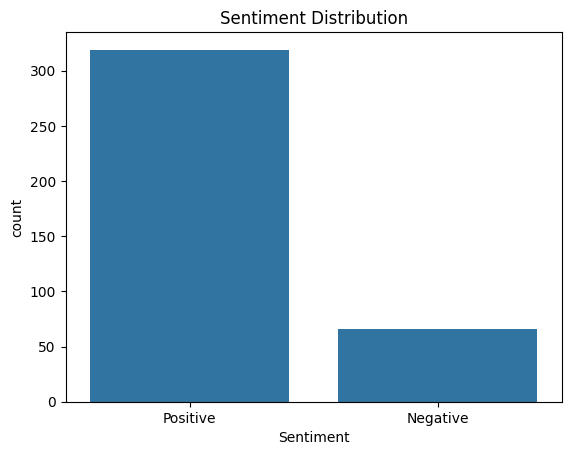

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

In [46]:
#Average Rating vs Sentiment
df.groupby("Sentiment")["Rating"].mean()

Sentiment
Negative    4.893939
Positive    4.890282
Name: Rating, dtype: float64

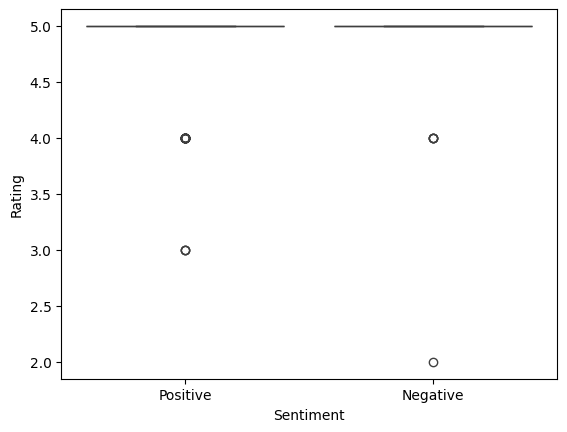

In [45]:
sns.boxplot(x="Sentiment", y="Rating", data=df)
plt.show()

In [47]:
#Correlation
df[["Rating", "Polarity"]].corr()

,Rating,Polarity
Rating,1.000000,-0.025334
Polarity,-0.025334,1.000000


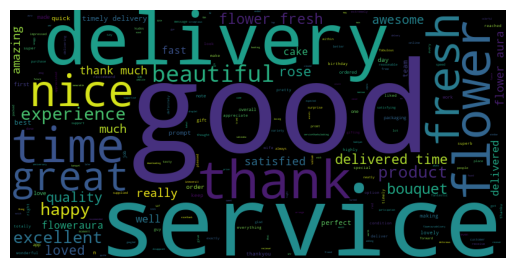

In [48]:
#word cloud
from wordcloud import WordCloud

positive_text = " ".join(df[df["Sentiment"]=="Positive"]["Clean_Review"])
negative_text = " ".join(df[df["Sentiment"]=="Negative"]["Clean_Review"])

wc = WordCloud(width=800, height=400).generate(positive_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

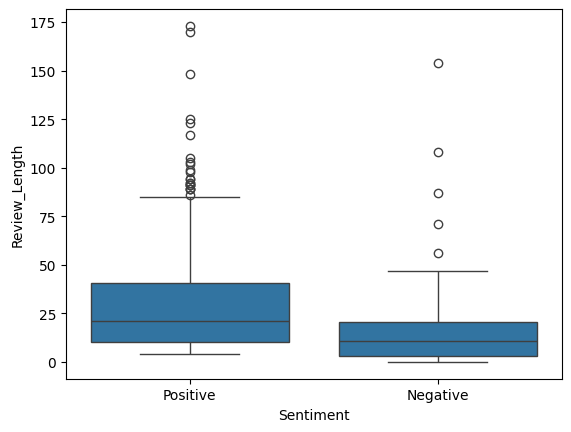

In [49]:
#Review Length Analysis
df["Review_Length"] = df["Clean_Review"].apply(len)

sns.boxplot(x="Sentiment", y="Review_Length", data=df)
plt.show()

## Reporting

In [ ]:
Overview :
1. Scraped 300+ reviews using Selenium
2. Extracted username, rating, review text
3. Cleaned and preprocessed data

Sentiment Results:
1. % Positive vs Negative
2. Average polarity score
3. Higher ratings strongly align with positive polarity

Key Insights:
Example:
1. Majority of users gave 4★ or 5★ ratings
2. Negative reviews frequently mention “battery” and “price”
3. Longer reviews tend to express stronger opinions

Recommendations:
1. Highlight camera & performance in marketing
2. Improve battery optimization (if common complaint)
3. Address pricing concerns in promotions